# Исследовательский анализ данных (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

<b>Задача</b><br>
Для составления аналитического отчета о безопасности дорог в РФ и принятию управленческих решений о планировании модернизации дорожной сети необходимо исследовать и подготовить данные по вопросам:
1. Найти регионы с наибольшей аварийностью.
2. Определить распределение числа ДТП по типам дорог, по видам ДТП.
3. Исследовать зависимость числа ДТП от дня недели.
4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.
5. Исследовать время ожидания сотрудников ДПС.
6. Исследовать число участников ДТП.
7. Исследовать ДТП в ночное время суток.
8. Определить наиболее опасные дороги.

<b>1. Регионы с наибольшей аварийностью

In [3]:
data = pd.read_excel('dtp_good.xlsx')
data.head(1)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252


In [4]:
# общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39085 entries, 0 to 39084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   reg_code             39085 non-null  int64         
 1   region_name          39085 non-null  object        
 2   road_code            39085 non-null  object        
 3   road_name            39085 non-null  object        
 4   road_type            39085 non-null  object        
 5   address              39085 non-null  object        
 6   crash_type_name      39085 non-null  object        
 7   crash_date           39085 non-null  int64         
 8   crash_time           39085 non-null  object        
 9   crash_reason         39085 non-null  object        
 10  fatalities_amount    39085 non-null  int64         
 11  victims_amount       39085 non-null  int64         
 12  vehicles_amount      39085 non-null  int64         
 13  participants_amount  39085 non-

In [5]:
print ('Число строк:', data.shape[0], '\n''Число столбцов:', data.shape[1])

Число строк: 39085 
Число столбцов: 17


In [6]:
#посмотрим распределение ДТП по регионам
dtp_count = data['region_name'].value_counts().sort_values(ascending=False)
dtp_count

Московская область                 2764
Краснодарский край                 2294
Ленинградская область              1425
Республика Башкортостан            1075
Ставропольский край                 956
                                   ... 
Севастополь                          90
Томская область                      89
Ямало-Ненецкий автономный округ      86
Магаданская область                  82
Республика Ингушетия                 82
Name: region_name, Length: 83, dtype: int64

In [7]:
#определим относительные значения ДТП в каждом регионе
dtp_count = data['region_name'].value_counts().sort_values(ascending=True).reset_index()
dtp_count.columns = ['region_name', 'dtp_count']
dtp_count['perc'] = (dtp_count['dtp_count'] / dtp_count['dtp_count'].sum()) * 100

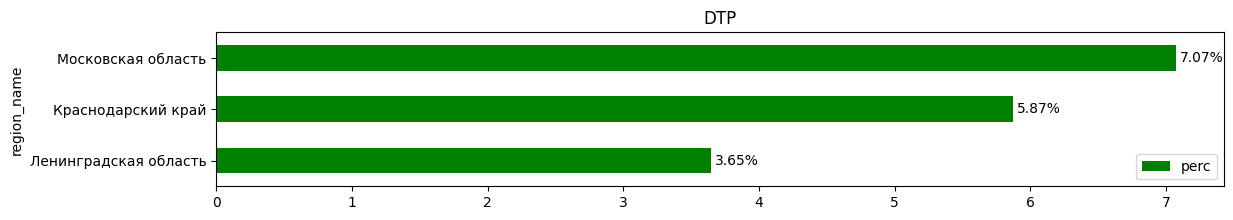

In [102]:
#построим диаграмму с относительными значениями и увидим регионы с наибольшей аварийностью
ax = dtp_count.tail(3).plot(kind ='barh',
                            color = 'green',
                             figsize=(13,2),
                             title ='DTP',
                             legend =True,
                             x='region_name',
                             y='perc')

ax.bar_label(ax.containers[0], fmt='%.2f%%',padding=3) 
plt.show()

Таким образом, регионами с наибольшей аварийностью оказались: Московская область, Краснодарский край и Ленинградская область

<b>2. Определить распределение числа ДТП по типам дорог, по видам ДТП.

In [9]:
#определим на каких типах дорог чаще всего происходят ДТП
dtp_count1 = data['road_type'].value_counts().sort_values(ascending=True).reset_index()
dtp_count1.columns = ['road_type', 'dtp_count']
dtp_count1

,road_type,dtp_count
0,отсутствует,192
1,Федеральная дорога общего пользования,16644
2,Региональная или межмуниципальная дорога общег...,22249


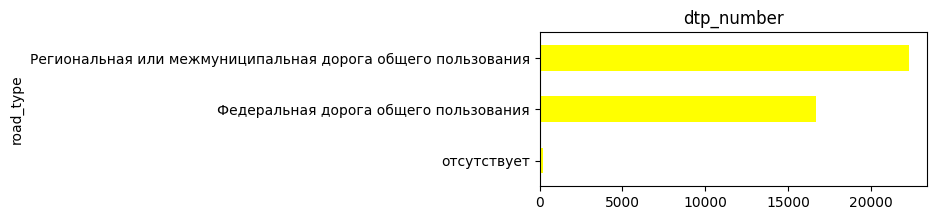

In [10]:
#построим диаграмму по типам дорог
dtp_count1.tail(5).plot(kind='barh',
                        color = 'yellow',
                        figsize=(5,2),
                        title='dtp_number',
                        legend=False,
                        x='road_type',
                        y='dtp_count'
                       )
plt.show()

In [104]:
#определим какие вилы ДТП самые распространенные
dtp_count2 = data['crash_type_name'].value_counts().sort_values(ascending=True).reset_index()
dtp_count2.columns = ['crash_type_name', 'count']
dtp_count2

,crash_type_name,count
0,Возгорание вследствие технической неисправност...,1
1,"Наезд на лицо, не являющееся участником дорожн...",3
2,"Наезд на лицо, не являющееся участником дорожн...",8
3,Наезд на гужевой транспорт,11
4,Наезд на внезапно возникшее препятствие,11
5,Падение груза,17
6,Отбрасывание предмета(отсоединение колеса),44
7,"Наезд на лицо, не являющееся участником дорожн...",57
8,Иной вид ДТП,108
9,Падение пассажира,191


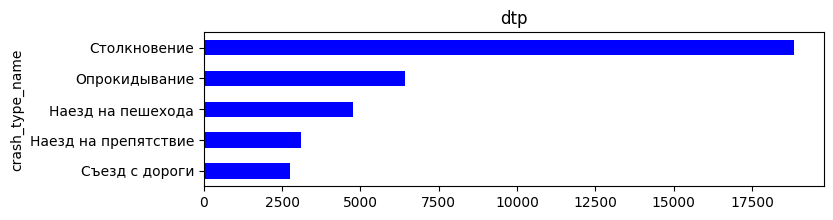

In [105]:
dtp_count2.tail(5).plot(kind='barh',
                        color = 'blue',
                       figsize=(8,2),
                       title='dtp',
                        legend=False,
                        x='crash_type_name',
                        y='count')
                       
plt.show()

##### Выводы:
Наибольшее количество ДТП происходит на региональных или межпуниципальных дорогах общего пользования <br>
Самыми распространенными видами ДТП являются столкновения и опрокидывания

<b>3. Исследовать зависимость числа ДТП от дня недели.

In [13]:
#посмотрим, в какие дни ДТП больше
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
dtp_count2 = data['crash_date_day'].value_counts()
dtp_count2 = pd.DataFrame(dtp_count2, index = days)
dtp_count2

,crash_date_day
Понедельник,5269
Вторник,4958
Среда,4886
Четверг,4946
Пятница,5902
Суббота,6602
Воскресенье,6522


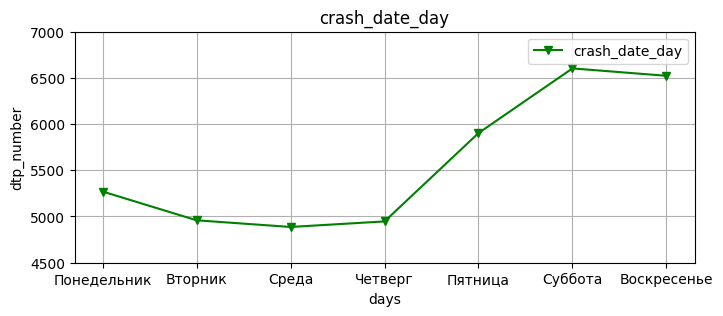

In [14]:
dtp_count2.plot(
        style='gv-',
        grid=True,
        figsize=(8, 3),
        ylim=(4500, 7000),
        title='crash_date_day',
        ylabel='dtp_number',
        xlabel='days'
       )
plt.show()

По графику видно, что наибольшее количество аварий приходятся на выходные дни, в особенности на субботу

<b>4. Определить регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП.

In [31]:
columns = ['fatalities_amount', 'victims_amount', 'vehicles_amount', 'participants_amount']
for col in columns:
    dtp = data.pivot_table(index='region_name', aggfunc='mean', values=col)
    dtp = dtp.sort_values(by=col, ascending=False).head(5)
    print(dtp)

                       fatalities_amount
region_name                             
Республика Ингушетия            1.987805
Республика Тыва                 1.942308
Республика Калмыкия             1.867816
Республика Дагестан             1.837037
Волгоградская область           1.798419
                                 victims_amount
region_name                                    
Чеченская Республика                   0.484536
Кабардино-Балкарская Республика        0.406504
Республика Ингушетия                   0.353659
Ульяновская область                    0.343972
Ростовская область                     0.322785
                       vehicles_amount
region_name                           
Санкт-Петербург               2.357955
Москва                        2.212219
Волгоградская область         2.173913
Новосибирская область         2.024283
Воронежская область           1.975806
                     participants_amount
region_name                             
Магаданская область   

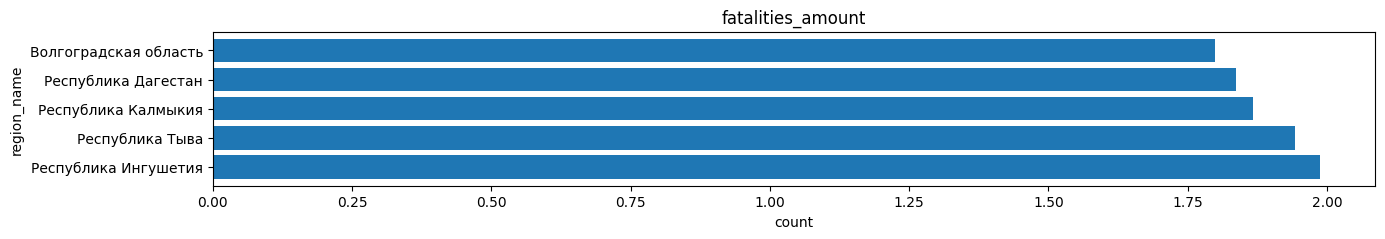

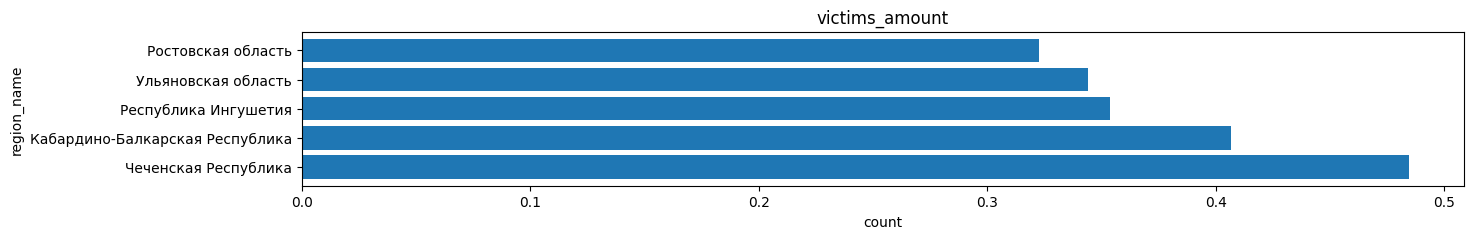

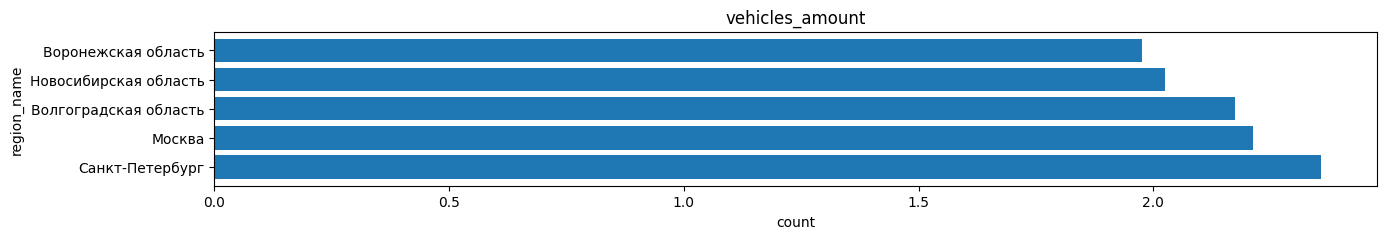

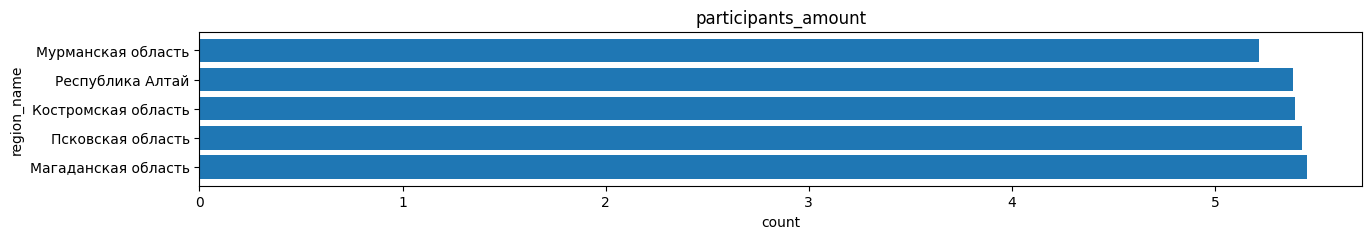

In [57]:
for col in columns:
    dtp = data.pivot_table(index='region_name', aggfunc='mean', values=col)
    dtp = dtp.sort_values(by=col, ascending=False).head(5)
    fig, axes = plt.subplots(figsize = (15, 2))
    axes.barh(dtp.index, dtp[col])
    axes.set_title(col)
    axes.set_xlabel('count')
    axes.set_ylabel('region_name')
    
    plt.show()


#### Из графиков видно, что: <br> 
1. По количеству погибших 1 место  среди регионов занимает Республика Ингушетия; <br> 
2. Самое большое число жертв наблюдается в Чеченской Республике; <br>
3. В Санкт-петербурге самое большое среднее значение аварий; <br> 
4. Лидером по среднему количеству участников ДТП является Магаданская область; <br> 

<b> 5. Исследовать время ожидания сотрудников ДПС.

<Axes: >

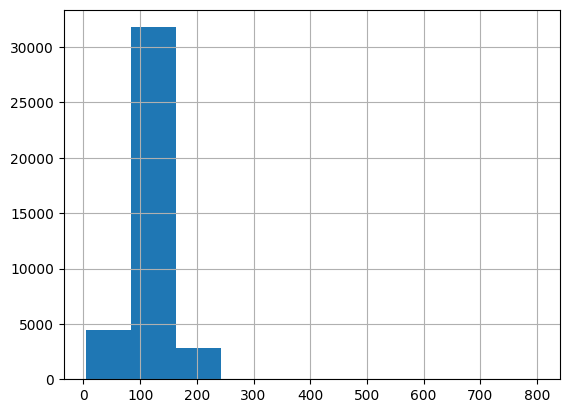

In [58]:
#построим гистограмму ожидания сотрудников ДПС
data['wait_time'].hist()

C:\Users\eliza\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='region_name', ylabel='wait_time'>

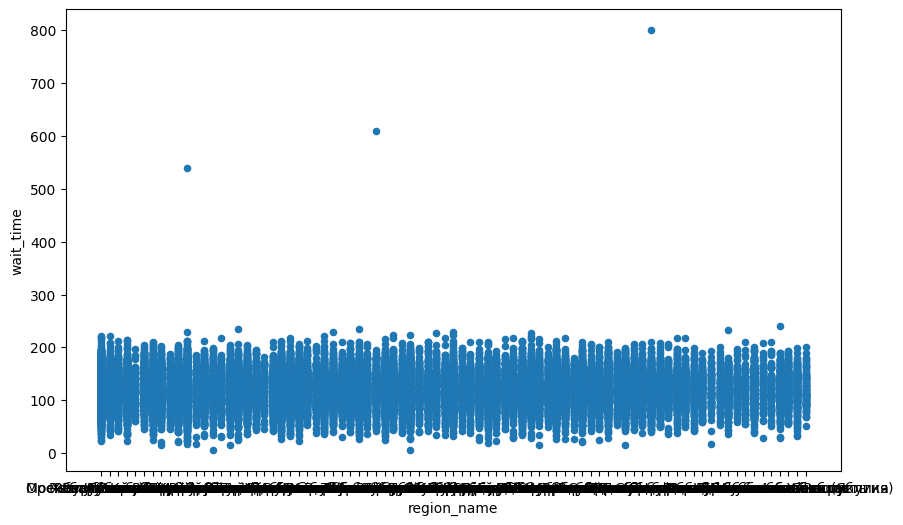

In [59]:
#построим точеченую диаграмму, чтобы посмотреть на единичные значения
data.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 6))

<Axes: >

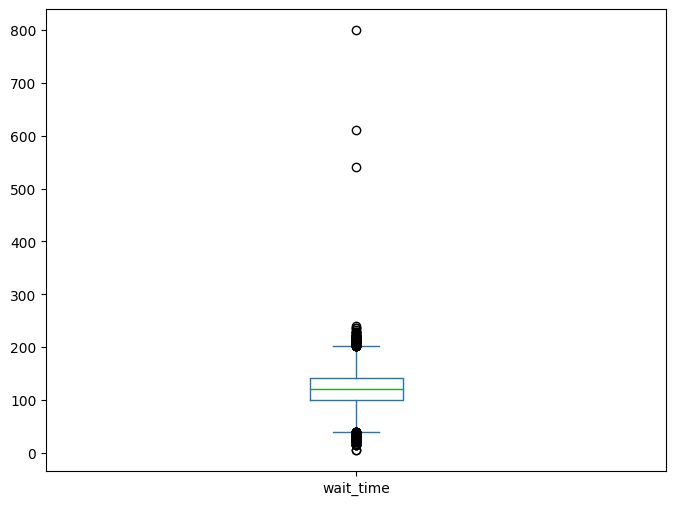

In [60]:
data['wait_time'].plot(kind='box', figsize=(8, 6)) 

мы видим хвост из выбросов  в диапазоне значений 0-40 и 200-250 и несколько 'экстремальных выбросов' за пределами 500 минут.

In [61]:
#посмотрим на характеристики столбца 'wait_time'
data['wait_time'].describe()

count    39085.000000
mean       120.405894
std         30.347460
min          4.748831
25%        100.007374
50%        120.524415
75%        140.796472
max        800.000000
Name: wait_time, dtype: float64

In [62]:
def ejection (dat,col):
    q75 = np.percentile(dat[col], 75)
    q25 = np.percentile(dat[col],25)
    iqr = q75-q25
    ejection_h = q75 + iqr*1.5
    ejection_l = q25 - iqr*1.5
    ejection_count = dat[col][(dat[col] > ejection_h) | (dat[col] < ejection_l)].count()
    ejection_perc = ejection_count/dat[col].count() * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc, iqr)
ejection(data,'wait_time')

(201.9801186935365,
 38.823726829941734,
 259,
 0.662658308814123,
 40.78909796589869)

In [63]:
#зная количество выбросов, отсортируем датасет без них
data_wait_time = data[(data['wait_time'] < ejection(data,'wait_time')[0]) & (data['wait_time'] > ejection(data,'wait_time')[1])]
data_wait_time = data_wait_time.reset_index(drop=True)
data_wait_time.head(3)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
0,46,Московская область,отсутствует,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,2018-12-31 23:55:00,Понедельник,143.807252
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987


<Axes: >

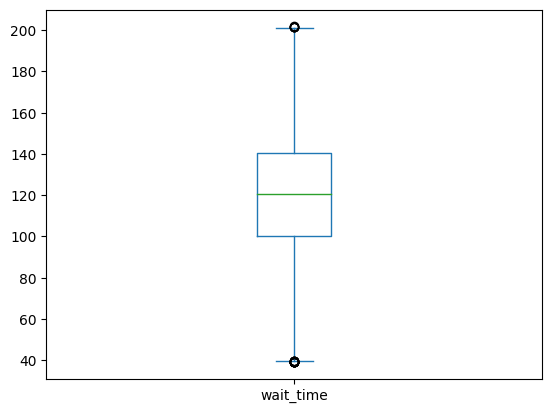

In [64]:
# проверим, что изменилось на графиках
data_wait_time["wait_time"].plot(kind="box")

In [65]:
data_wait_time.describe()

,reg_code,crash_date,fatalities_amount,victims_amount,vehicles_amount,participants_amount,wait_time
count,38826.000000,3.882600e+04,38826.000000,38826.000000,38826.000000,38826.000000,38826.000000
mean,53.041003,2.018085e+07,1.554448,0.232602,1.790038,4.314274,120.379495
std,73.066801,2.529254e+02,1.410013,0.591948,0.894260,3.536578,29.160773
min,1.000000,2.018040e+07,0.000000,0.000000,1.000000,2.000000,38.858157
25%,22.000000,2.018062e+07,1.000000,0.000000,1.000000,2.000000,100.174698
50%,46.000000,2.018090e+07,1.000000,0.000000,2.000000,3.000000,120.526717
75%,70.000000,2.018110e+07,2.000000,0.000000,2.000000,4.000000,140.621013
max,719.000000,2.018123e+07,46.000000,13.000000,19.000000,85.000000,201.878534


Таким образом, самое большое значение 201.878834 минуты

In [66]:
#узнаем, в каких регионах время ожидания наибольшее
 

,wait_time
region_name,
Республика Марий Эл,124.047395
Калининградская область,123.739773
Ульяновская область,123.374310
Алтайский край,123.280042
Санкт-Петербург,123.233526


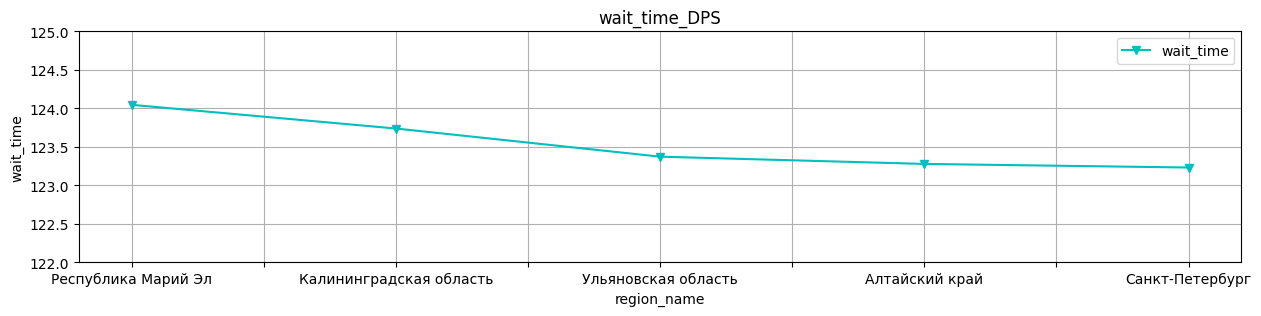

In [101]:
data_wait_time2.head().plot(
        style='cv-',
        grid=True,
        figsize=(15, 3),
        ylim=(122, 125),
        title='wait_time_DPS',
        ylabel='wait_time',
        xlabel='region_name'
       )
plt.show()


По графику видно, что самое длительное ожидание сотрудников ДПС в Республике Марий Эл, что превышает среднее значение

<b> 6. Исследование числа участников ДТП

<Axes: >

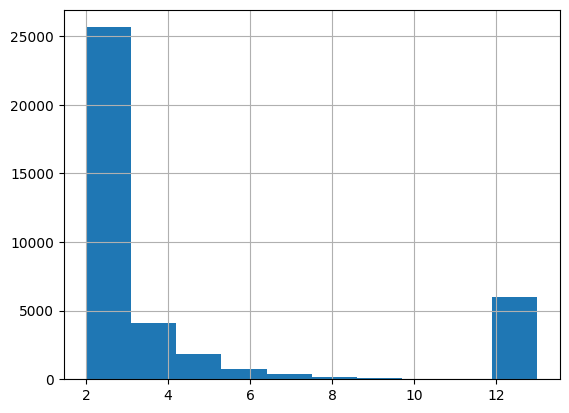

In [68]:
# построим гистограмму 'participants_amount'
data['participants_amount'].hist(range=(2,13))

C:\Users\eliza\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='region_name', ylabel='participants_amount'>

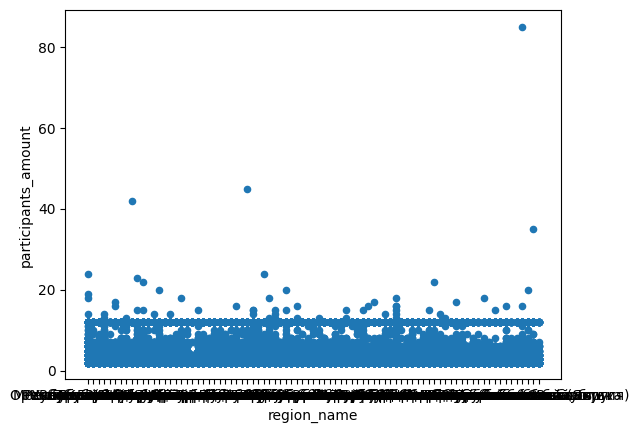

In [69]:
#построим точечную диаграмму
data.plot(kind="scatter",y="participants_amount",x = "region_name")

<Axes: >

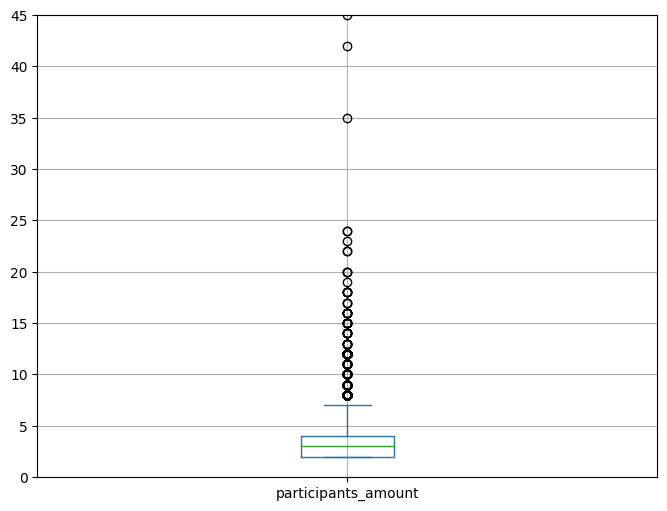

In [70]:
data['participants_amount'].plot(kind='box', figsize=(8, 6), ylim=(0,45), grid=True)

In [71]:
data['participants_amount'].describe()

count    39085.000000
mean         4.316259
std          3.537298
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         85.000000
Name: participants_amount, dtype: float64

In [72]:
q75 = np.percentile(data['participants_amount'], 75)
q25 = np.percentile(data['participants_amount'], 25)
iqr = q75 - q25 
participants_amount_ejection_h = q75 +iqr * 1.5
participants_amount_ejection_l = q25 - iqr * 1.5

ejection(data,'participants_amount')

(7.0, -1.0, 6359, 16.269668670845594, 2.0)

Получили количество выбросов, равное 6359


In [73]:
#определим границу значений, при percentile = 95
participants_amount_ejection_h = np.percentile(data['participants_amount'], 95)
participants_amount_ejection_h

12.0

In [74]:
#определим число выбросов
participants_amount_count = data['participants_amount'][data['participants_amount'] > participants_amount_ejection_h].count()
print('Число выбросов:', participants_amount_count )

Число выбросов: 59


In [75]:
#определим процент выбросов
participants_amount_ejection_perc = (participants_amount_count / len(data)) * 100
participants_amount_ejection_perc

0.15095305104259946

<Axes: >

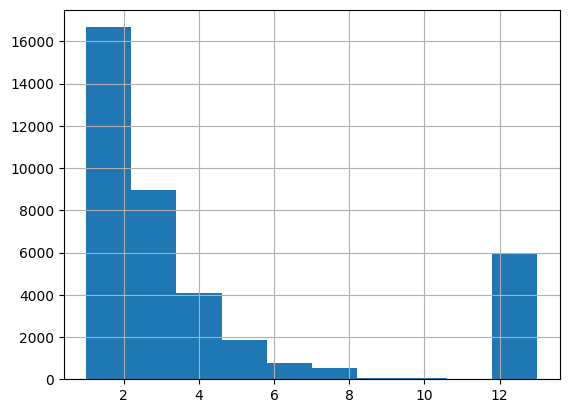

In [76]:
data['participants_amount'].hist(range=(1, 13))

По гистограмме видно, что в промежуток от 11 до 12 представлены только единичные значения

In [77]:
# убираем выбросы
good_data_participants_amount = data[(data["participants_amount"] < np.percentile(data["participants_amount"],95))]
good_data_participants_amount.head(3)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,2018-12-31 23:55:00,Понедельник,148.198679
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,2018-12-31 23:40:00,Понедельник,71.441987
3,8,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20:00,Нахождение на проезжей части без цели её перех...,0,1,1,2,2018-12-31 23:20:00,Понедельник,143.569055


<Axes: >

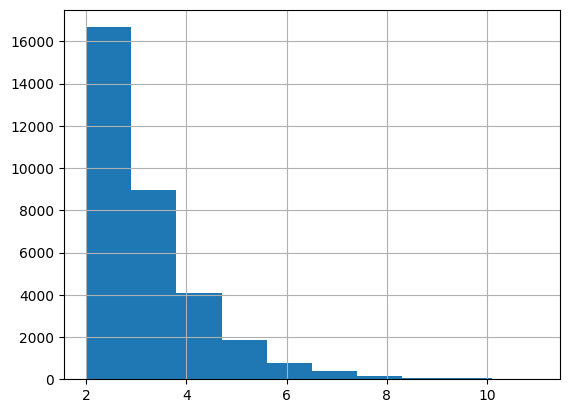

In [78]:
good_data_participants_amount['participants_amount'].hist()

In [79]:
good_data_participants_amount['participants_amount'].describe()

count    33063.000000
mean         2.905121
std          1.260266
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: participants_amount, dtype: float64

Удалив выбросы, стало ясно, что максимальным числом является 11

In [85]:
#узнаем, в каких регионах среднее количество участников наибольшее
good_data_participants_amount1 = good_data_participants_amount.pivot_table( index = 'region_name',
                      aggfunc = 'mean',
                      values = 'participants_amount')
good_data_participants_amount2 = good_data_participants_amount1.sort_values(by = 'participants_amount', ascending=False)
good_data_participants_amount2.head()

,participants_amount
region_name,
Республика Калмыкия,3.678322
Республика Тыва,3.335821
Ямало-Ненецкий автономный округ,3.328571
Республика Ингушетия,3.309859
Забайкальский край,3.269341


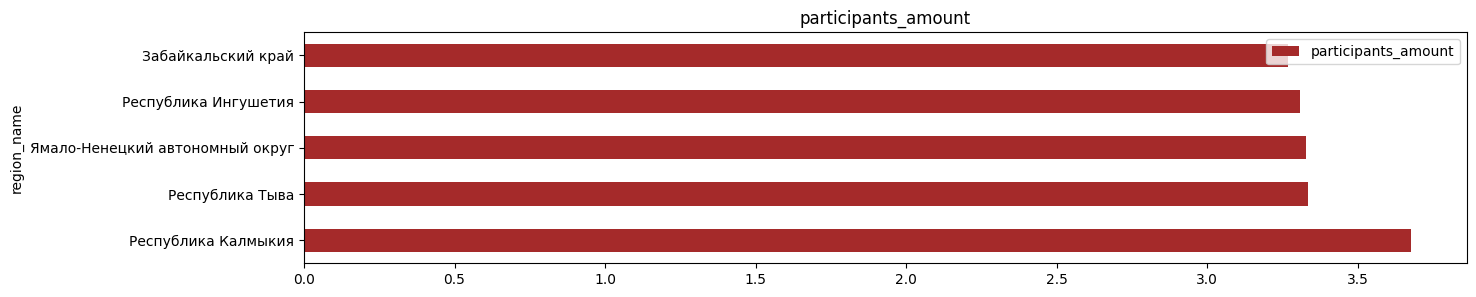

In [86]:
good_data_participants_amount2.head().plot(kind = 'barh',
        color = 'brown',
        figsize=(15, 3),
        ylim=(2, 4),
        title='participants_amount',
        ylabel='participants_amount',
        xlabel='region_name'
       )
plt.show()

Наибольшое среднее число участников ДТП наблюдается в Республике Калмыкия

<b>7. Исследовать ДТП в ночное время суток.

<Axes: ylabel='Frequency'>

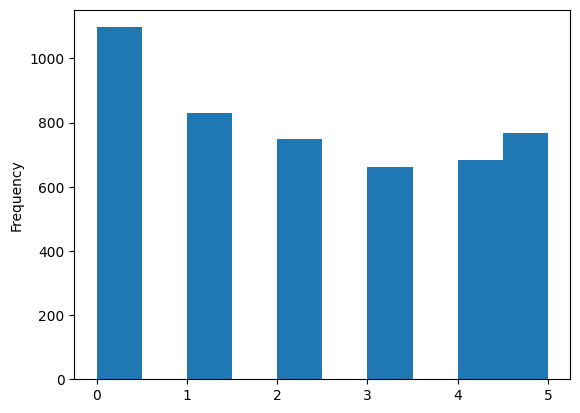

In [87]:
#определим какой процент ДТП составляют ДТП, произошедшие в ночное время суток.
data['hour'] = data['datetime'].dt.hour
data.query('hour.isin((0,1,2,3,4,5))')["hour"].plot(kind="hist")

In [88]:
#определим какой процент составляют ночные ДТП
data.query('0 <= hour <= 5')['fatalities_amount'].count() / len(data) * 100

12.257899449916849

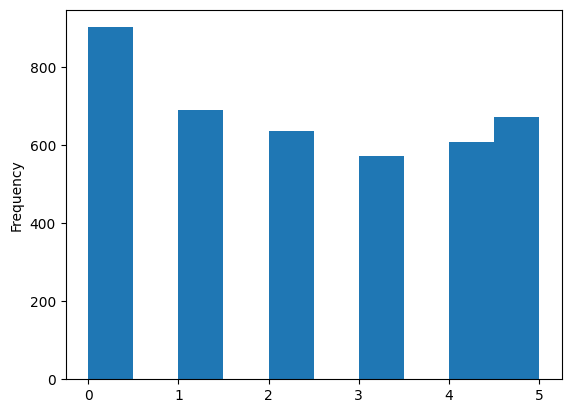

In [89]:
hour = data.query('hour.isin((0,1,2,3,4,5)) and fatalities_amount > 0')["hour"].plot(kind="hist")

Самое большое число ДТП случаются в 12 часов ночи

In [90]:
print('число ДТП в будние дни кроме пятницы:', data.query('fatalities_amount > 0 and crash_date_day != "Пятница" and crash_date_day != "Суббота" and crash_date_day != "Воскресенье"')['fatalities_amount'].count())
print('число ДТП в пятницу:', data.query('fatalities_amount > 0 and crash_date_day == "Пятница"')['fatalities_amount'].count())
print('число ДТП в выходные дни:', data.query('fatalities_amount > 0 and crash_date_day == "Суббота" or crash_date_day == "Воскресенье"')['fatalities_amount'].count())

число ДТП в будние дни кроме пятницы: 17987
число ДТП в пятницу: 5285
число ДТП в выходные дни: 12444


<b>8.Определить наиболее опасные дороги.

In [91]:
federal = data.query('road_type == "Федеральная дорога общего пользования"')
local = data.query('road_type == "Региональная или межмуниципальная дорога общего пользования"')

print(pd.pivot_table(federal, index = 'road_code', aggfunc='sum', values = 'fatalities_amount').sort_values(by='fatalities_amount', ascending=False).head())
print(pd.pivot_table(local, index = 'road_code', aggfunc='sum', values = 'fatalities_amount').sort_values(by="fatalities_amount", ascending=False).head())

           fatalities_amount
road_code                   
М-7                     1933
М-5                     1922
М-4                     1629
Р-217                   1614
Р-255                    918
             fatalities_amount
road_code                     
отсутствует              27726
35А-002                    216
03К-002                    170
35А-001                    167
87Р-001                    153


Самой опасной дорогой по количеству погибших является дорога "М-7" для Федеральных дорог и "35А-002" для Региональных

In [92]:
danger_road_f = data.query('road_code == "М-7"')
danger_road1_f = danger_road_f.pivot_table( index = 'region_name',
                      aggfunc = 'sum',
                      values = 'fatalities_amount')
danger_road1_f = danger_road1_f.sort_values(by = 'fatalities_amount', ascending = False)
danger_road1_f.head()

,fatalities_amount
region_name,
Владимирская область,563
Нижегородская область,343
Республика Татарстан,262
Московская область,202
Удмуртская Республика,192


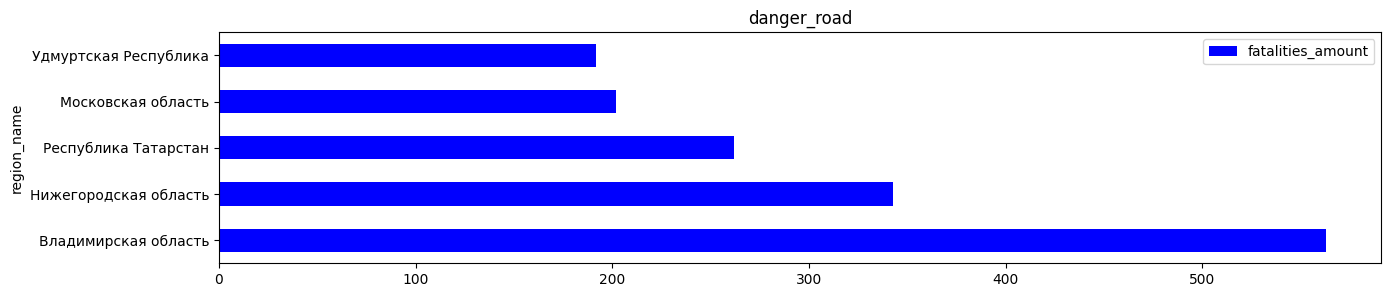

In [93]:
danger_road1_f.head(5).plot(kind = 'barh',
        color ='blue',
        figsize=(15, 3),
        ylim=(20, 600),
        title='danger_road',
        ylabel='fatalities_amount',
        xlabel='region_name'
       )
plt.show()

В большей степени смертельные случаи на дороге "М-7" происходят во Владимирской области

In [94]:
danger_road_r = data.query('road_code == "35А-002"')
danger_road1_r = danger_road_r.pivot_table( index = 'region_name',
                      aggfunc = 'sum',
                      values = 'fatalities_amount')
danger_road1_r = danger_road1_r.sort_values(by = 'fatalities_amount', ascending=False)
danger_road1_r.head()

,fatalities_amount
region_name,
Республика Крым,216


Получается, что все смертельные случае на дороге "35А-002" происходят в Республике Крым

In [96]:
#определим дороги, которые пересекают сразу несколько регионов. Выведем топ-10
road_code = data["road_code"].unique()
cross_regions = []
for code in road_code:
    cross_regions.append([code,len(data[data['road_code'] == code]["reg_code"].unique())])
    
cross_roads = sorted(cross_regions, key=lambda x: x[1], reverse=True)
cross_roads[1:11]

[['М-5', 11],
 ['Р-217', 9],
 ['М-7', 9],
 ['Р-22', 9],
 ['М-4', 7],
 ['М-8', 6],
 ['М-2', 6],
 ['М-10', 5],
 ['Р-255', 5],
 ['Р-254', 5]]

Дорога "М-5" пересекает большее количество дорог

In [97]:
#посмторим, какое количество людей суммарно участновало в ДТП и погибло в регионах
cross_roads1 = cross_roads[1:11]
for road in cross_roads1:
    print(road[0], 'fatalities:', data[data["road_code"]==road[0]]["fatalities_amount"].sum(), 'participants:', data[data["road_code"]==road[0]]["participants_amount"].sum())

М-5 fatalities: 1922 participants: 4744
Р-217 fatalities: 1614 participants: 3860
М-7 fatalities: 1933 participants: 4818
Р-22 fatalities: 839 participants: 2068
М-4 fatalities: 1629 participants: 4018
М-8 fatalities: 753 participants: 1891
М-2 fatalities: 773 participants: 1875
М-10 fatalities: 671 participants: 1936
Р-255 fatalities: 918 participants: 2409
Р-254 fatalities: 468 participants: 1188


Наибольшее количество летальных исходов произошло на дорогах "М-7" и "М-5", наибольшее количество участников также на этих дорогах <br>
Наименьшее число смертей было на дорогах "Р-254" и "М-10", а наименьшее количество участников ДТП было на "Р-254", "М-2" и "М-8"

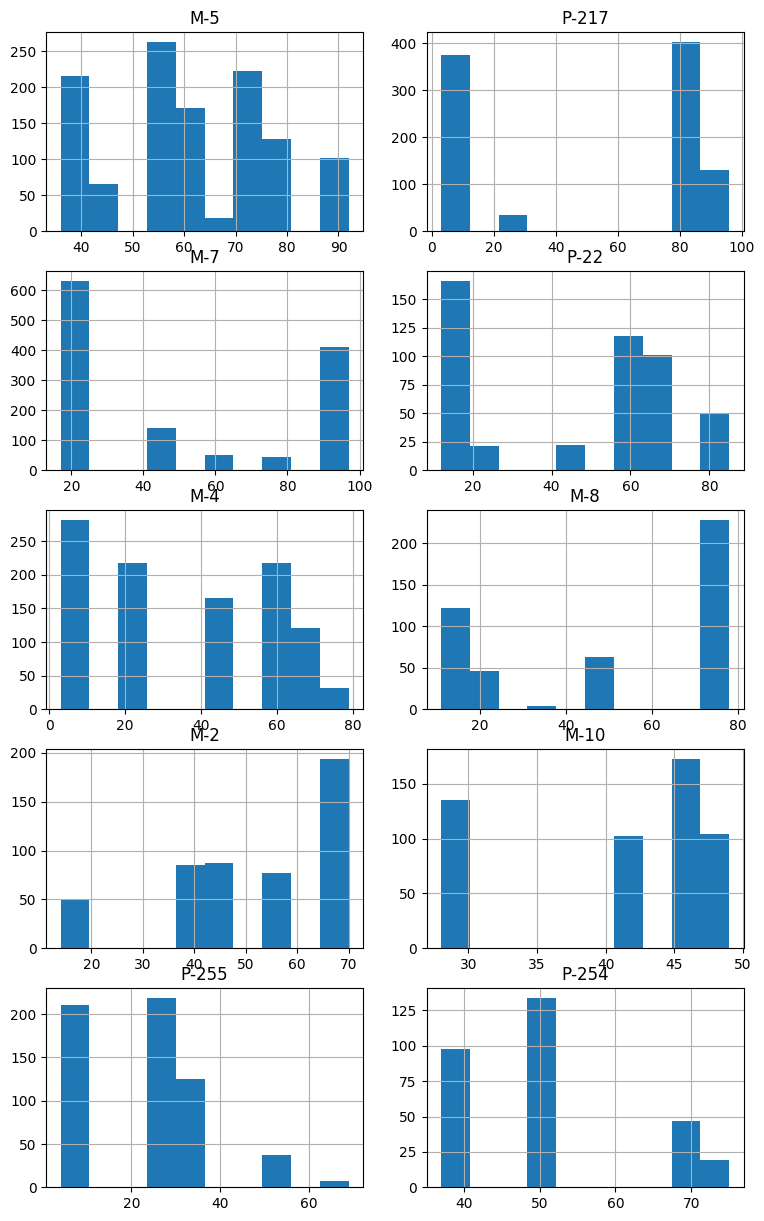

In [98]:
cross=1
for road in cross_roads1:
        matplotlib.pyplot.subplot(5, 2, cross) 
        cross +=1
        data[data['road_code'] == road[0]]['reg_code'].hist(figsize=(9,15))
        plt.title(road[0])

### Общие выводы по проекту:
1. Наибольшее число аварий произошло в Московской области и Краснодарском крае;
2. Наибольшее количество ДТП произошло на региональных или межпуниципальных дорогах общего пользования, а самыми распространенными видами ДТП являются столкновения и опрокидывания;
3. Большинство ДТП произошло в выходные дни, а именно в субботу;
4. По количеству погибших Республика Ингушетия и Республика Тыва занимают лидирующие позиции;
5. Самое большое число жертв наблюдается в Чеченской Республике;
6. В Санкт_петербурге самое большое среднее значение аварий;
7. Лидером по среднему количеству участников ДТП является Магаданская область;
8. Дольше всех сотрудников ДПС ожидают в Республике Марий Эл;
9. Больше всего участников ДТП в Республике Калмыкия;
10. В ночное время больше всего происшествий случается в 12 часов ночи;
11. Самой опасной дорогой по количеству погибших для Федеральных дорог является дорога "М-7" и дорога "35А-002" для Региональных;
12. Дорога "М-5" пересекает наибольшее количество дорог;
13. Наибольшее количество летальных исходов произошло на дорогах "М-7" и "М-5", наибольшее количество участников также на этих дорогах;
14. Наименьшее число смертей было на дорогах "Р-254" и "М-10", а наименьшее количество участников ДТП было на "Р-254", "М-2" и "М-8"